In [10]:
print('me')

me


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import random
from tqdm import tqdm

In [16]:
class Thompson():
    def __init__(self, q):                
                
        self.tau_0 = 0.0001  # the posterior precision
        self.mu_0 = 1       # the posterior mean
        self.count = 0
        self.mean = 0

        
    def betaupdate(self,Reward):    
        self.count += 1
        self.mean = (1 - 1.0/self.count) * self.mean + (1.0/self.count) * Reward
                    
    def update(self,Reward):
        self.betaupdate(Reward)
        self.mu_0 = ((self.tau_0 * self.mu_0) + (self.count * self.mean))/(self.tau_0 + self.count)        
        self.tau_0 += 1
    
    def sample(self):
        return (np.random.randn() / np.sqrt(self.tau_0)) + self.mu_0


In [4]:
class arms:
    def __init__(me,delta,T):
        me.arm1=random.normal(loc=0, scale=1, size=T)
        me.arm2=random.normal(loc=delta, scale=1, size=T)
        
    def getarms(me):
        return [me.arm1,me.arm2]
    def getloss(me, it):
        return [me.arm1[it],me.arm2[it]]

THOMPSON !!!

In [136]:

def TS(delta,T,arm=None):
    loss=0
    loss1=0
    loss2=0
    regret=0
    regretbound=[]
    if arm:
        arm=arm
    else:
        arm=arms(delta,T)
            
    arm_val = [Thompson(0) for _ in range(2)]
    chk=0
    for t in range(0,T):
        lossvec=np.array(arm.getloss(t-1))
        lossvec=1-lossvec
        loss1+=lossvec[0]
        loss2+=lossvec[1]
        socket_samples = [itera.sample() for itera in arm_val]
        socket_index = np.argmax(socket_samples)
        reward=lossvec[socket_index]
        loss+=lossvec[socket_index]
#         print(reward,lossvec)
        arm_val[socket_index].update(reward)
        regret = np.abs(loss - loss1)
        regretbound.append(regret)



    return regretbound

In [34]:

loss1 =  np.random.normal(loc=1, scale= 1, size = (10000,1))
loss2 =  np.random.normal(loc=2, scale= 1, size = (10000,1))
data = np.concatenate((loss1, loss2), axis = 1)

In [36]:
data[]

array([-0.58312654,  0.31855316])

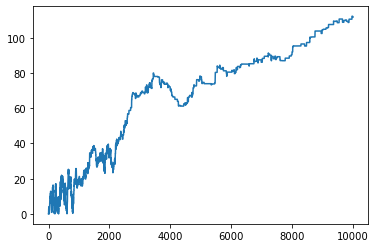

In [149]:
plt.plot(TS(0.1,10000))


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:45<00:00, 16.54s/it]


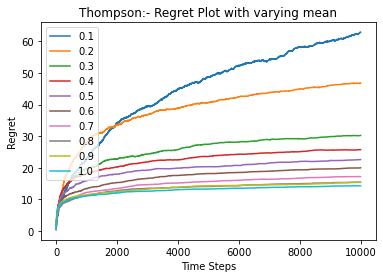

In [109]:

for i in tqdm(range(1,11)):
    j=i/10
    ukla=np.array([0.0 for i in range(10000)])
    for i in range(100):
        arm=arms(delta,T)
        ukla+=np.array(TS(j,10000,arm))
    ukla=ukla/100
    plt.plot(ukla,label=str(j))
    
plt.legend(loc='best')
plt.title("Thompson:- Regret Plot with varying mean")
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.show()


for ucb USING IT'S CLASSES

In [111]:
class arms:
    def __init__(me,delta,T):
        me.arm1=random.normal(loc=0, scale=1, size=T)
        me.arm2=random.normal(loc=delta, scale=1, size=T)
        
    def getarms(me):
        return [me.arm1,me.arm2]
    def getloss(me, it):
        return [me.arm1[it],me.arm2[it]]
def UCB(alpha,T=1000,arms=[0 for k in range(1000)]):
    loss=0
    loss1=0
    loss2=0
    regretbound=[]
    arm=arms
    known_bandits=newbandits(alpha)
    chk=0
    for t in range(0,T):
        lossvec=np.array(arm.getloss(t-1))
        lossvec=1-lossvec
        loss1+=lossvec[0]
        loss2+=lossvec[1]
        #_______
        if t<2:
            i=t
            loss+=lossvec[i]
            known_bandits.update(lossvec[i],i,t)
            regretbound.append(np.amax([loss1,loss2])-loss)
        else:
            i=np.argmax(known_bandits.getUCB())
            if chk==0:
#                 print(i)
                chk=1
            loss+=lossvec[i]
            known_bandits.update(lossvec[i],i,t)
            regretbound.append(np.amax([loss1,loss2])-loss)
#     print(i)
#     print(known_bandits.returnarm())
#     print(known_bandits.getUCB())
#     print([known_bandits.count1,known_bandits.count2])
#     print([loss1,loss2,loss])
#     print(full_bandits.returnarm())
#     print(full_bandits.getUCB())
#     print([full_bandits.count1,full_bandits.count2])
#     regret=loss- np.amin([loss1,loss2])
#     print(regret)
#     print(regretbound)
    return regretbound
        
        
        
    

COMPARE WITH UCB

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

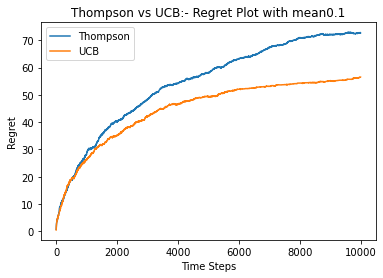

 10%|████████▎                                                                          | 1/10 [00:43<06:29, 43.28s/it]

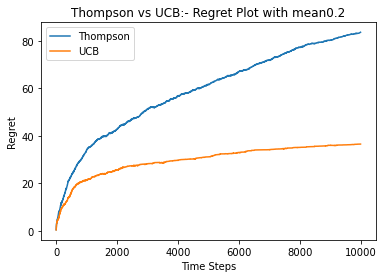

 20%|████████████████▌                                                                  | 2/10 [01:30<05:55, 44.48s/it]

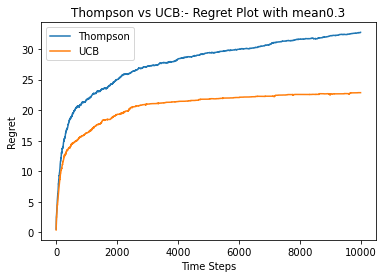

 30%|████████████████████████▉                                                          | 3/10 [02:18<05:18, 45.47s/it]

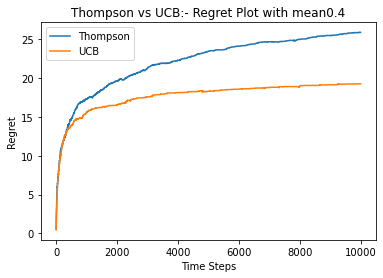

 40%|█████████████████████████████████▏                                                 | 4/10 [03:04<04:34, 45.69s/it]

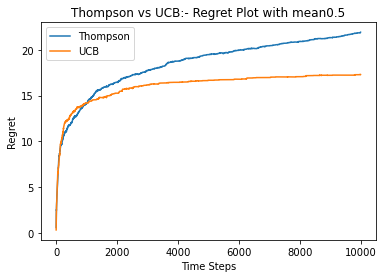

 50%|█████████████████████████████████████████▌                                         | 5/10 [03:50<03:48, 45.65s/it]

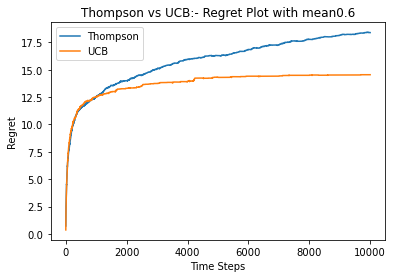

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [04:38<03:06, 46.52s/it]

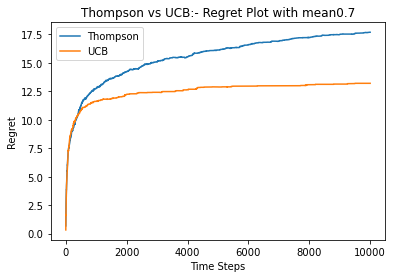

 70%|██████████████████████████████████████████████████████████                         | 7/10 [05:26<02:20, 47.00s/it]

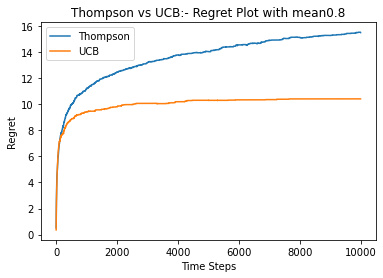

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [06:16<01:35, 47.83s/it]

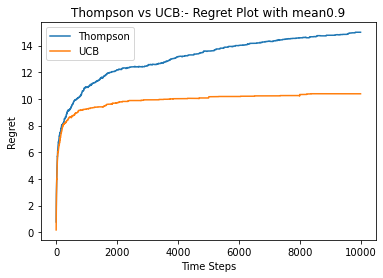

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [07:05<00:48, 48.30s/it]

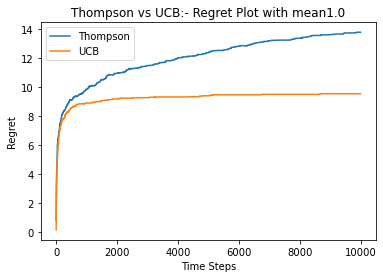

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [07:55<00:00, 47.59s/it]


In [152]:

for i in tqdm(range(1,11)):
    j=i/10
    ukla=np.array([0.0 for i in range(10000)])
    bukla=np.array([0.0 for i in range(10000)])
    for i in range(100):
        arm=arms(j,10000)
        ukla+=np.array(TS(j,10000,arm))
        bukla+=np.array(UCB(1,10000,arm))
    ukla=ukla/100
    bukla=bukla/100
    plt.plot(ukla,label="Thompson")
    plt.plot(bukla,label="UCB")

    plt.legend(loc='best')
    plt.title("Thompson vs UCB:- Regret Plot with mean"+str(j))
    plt.xlabel('Time Steps')
    plt.ylabel('Regret')
    plt.show()
